https://docs.fast.ai/tutorial.vision.html

In [1]:
from fastai.vision.all import *
from pathlib import Path

In [2]:
#path = Path("/Users/satoc/Dropbox/programing/py_with_windows/multi_task_learning/data")
path = Path("C:/Users/singm/Dropbox/programing/py_with_windows/multi_task_learning/data/")

In [3]:
print(type(path))
print(path)
print(path/"images")
print(type(path/"images"))

<class 'pathlib.WindowsPath'>
C:\Users\singm\Dropbox\programing\py_with_windows\multi_task_learning\data
C:\Users\singm\Dropbox\programing\py_with_windows\multi_task_learning\data\images
<class 'pathlib.WindowsPath'>


In [4]:
path.ls()

(#4) [Path('C:/Users/singm/Dropbox/programing/py_with_windows/multi_task_learning/data/annotations'),Path('C:/Users/singm/Dropbox/programing/py_with_windows/multi_task_learning/data/chest_xray'),Path('C:/Users/singm/Dropbox/programing/py_with_windows/multi_task_learning/data/images'),Path('C:/Users/singm/Dropbox/programing/py_with_windows/multi_task_learning/data/UTK')]

In [5]:
files = get_image_files(path/'images')
len(files)

7390

In [6]:
def label_func(f): return f[0].isupper()

In [7]:
files[0][0]

TypeError: 'WindowsPath' object is not subscriptable

In [8]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


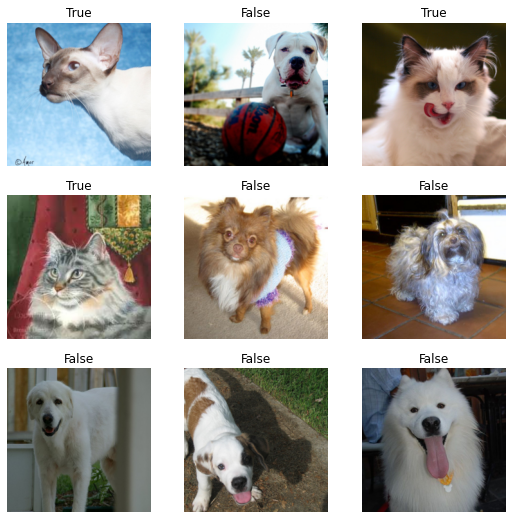

In [9]:
dls.show_batch()

In [10]:
type(dls)

fastai.data.core.DataLoaders

In [11]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [12]:
type(learn)

fastai.learner.Learner

In [13]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.154296,0.039742,0.013532,02:09


epoch,train_loss,valid_loss,error_rate,time
0,0.052532,0.011042,0.004736,00:47


In [14]:
learn.predict(files[0])

('True', tensor(1), tensor([1.0725e-08, 1.0000e+00]))

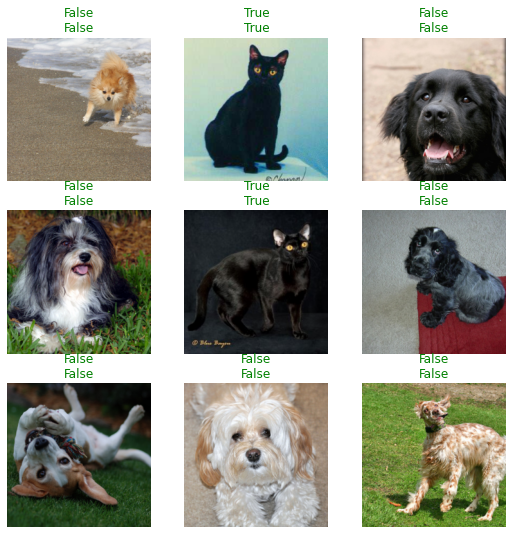

In [16]:
learn.show_results()

# Classifying breeds

In [18]:
files[0].name

'Abyssinian_1.jpg'

In [19]:
pat = r'^(.*)_\d+.jpg'

In [20]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [21]:
type(dls)

fastai.data.core.DataLoaders

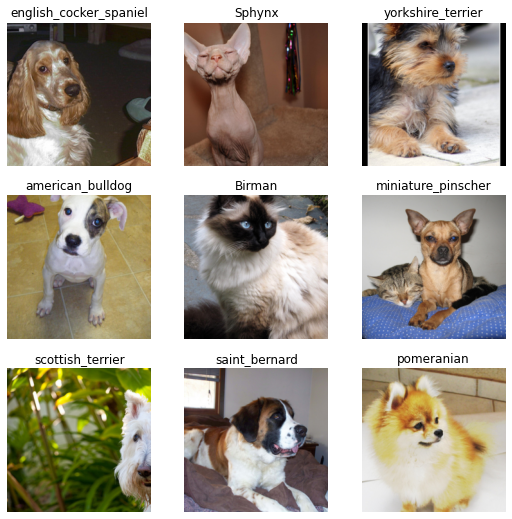

In [22]:
dls.show_batch()

In [23]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.0063095735386013985)

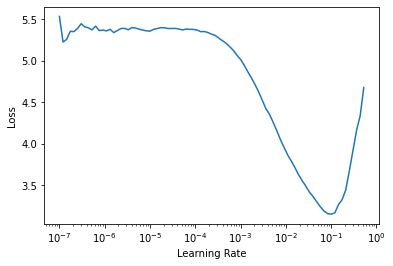

In [24]:
learn.lr_find()

In [25]:
learn.fine_tune(2,3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.252993,0.333509,0.106901,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.479933,0.385395,0.120433,00:50
1,0.257350,0.221433,0.064953,00:49


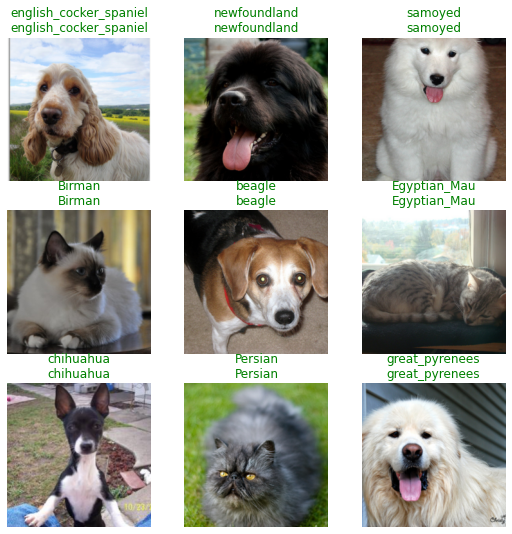

In [26]:
learn.show_results()